# 0.&nbsp;Import Library

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("syedanwarafridi/vehicle-sales-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/vehicle-sales-data


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# 1.&nbsp;Import Dataset

In [ ]:
dataset = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

# 2.&nbsp;Evaluate Data Structure

In [ ]:
dataset.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Deskripsi**

year : Tahun pembuatan mobil

make : Merek mobil

model : Model spesifik

trim : Varian atau level trim

body : Jenis bodi mobil

transmisson : Jenis transmisi

vin : nomor identitas kendaraan

state : negara kendaraan terdaftar

condition : Skor kondisi fisik dan mekanis mobil

odometer : Jarak tempuh mobil

color : warna mobil

interior : warna interior

seller :  penjual

nmr : nilai pasar perkiraan kendaraan

sellingprice : harga mobil

saledate : tanggal penjualan


In [ ]:
#menyimpan variabel vin dan saledate karena tidak digunakan
vin = dataset['vin']
saledate = dataset['saledate']

#menghapus kolom vin dan saledatae
dataset = dataset.drop(columns=['vin', 'saledate'])

In [ ]:
dataset.shape

(558837, 14)

In [ ]:
dataset.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [ ]:
dataset.dtypes

,0
year,int64
make,object
model,object
trim,object
body,object
transmission,object
state,object
condition,float64
odometer,float64
color,object


#3.&nbsp;Exploratory Data Analysis

##3.1. Checking Columns that have more than one data types

In [ ]:
# Check data types for each column and identify columns with mixed data types, including counts
def check_mixed_data_types_with_counts(df):
    mixed_type_columns = {}
    for col in df.columns:
        type_counts = df[col].apply(type).value_counts().to_dict()
        if len(type_counts) > 1:
            mixed_type_columns[col] = type_counts
    return mixed_type_columns

mixed_types_with_counts = check_mixed_data_types_with_counts(dataset)

if mixed_types_with_counts:
    print("Columns with mixed data types and their counts:")
    for col, types in mixed_types_with_counts.items():
        print(f"- {col}: {types}")
else:
    print("No columns with mixed data types found.")

# Additionally, print the data types of each column as initially inferred by pandas
print("\nData types inferred by pandas:")
print(dataset.dtypes)

Columns with mixed data types and their counts:
- make: {<class 'str'>: 548536, <class 'float'>: 10301}
- model: {<class 'str'>: 548438, <class 'float'>: 10399}
- trim: {<class 'str'>: 548186, <class 'float'>: 10651}
- body: {<class 'str'>: 545642, <class 'float'>: 13195}
- transmission: {<class 'str'>: 493485, <class 'float'>: 65352}
- color: {<class 'str'>: 558088, <class 'float'>: 749}
- interior: {<class 'str'>: 558088, <class 'float'>: 749}

Data types inferred by pandas:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
dtype: object


##3.2. Delete data

###3.2.1. Delete Data that have Incompatible Data Types

In [ ]:
# Define the columns to check for mixed types
cols_to_check = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

# Create a dictionary to store the counts of replaced float values
replaced_counts = {}

# Iterate through the specified columns and replace float values with NaN
for col in cols_to_check:
    # Count the number of float values before replacement
    float_count = dataset[col].apply(lambda x: isinstance(x, float)).sum()
    replaced_counts[col] = float_count

    # Replace float values with NaN
    dataset[col] = dataset[col].apply(lambda x: np.nan if isinstance(x, float) else x)

print("Float data types in specified columns have been replaced with NaN.")
print("\nNumber of float values replaced with NaN in each column:")
for col, count in replaced_counts.items():
    print(f"- {col}: {count}")

Float data types in specified columns have been replaced with NaN.

Number of float values replaced with NaN in each column:
- make: 10301
- model: 10399
- trim: 10651
- body: 13195
- transmission: 65352
- color: 749
- interior: 749


##3.3. Check Missing Value

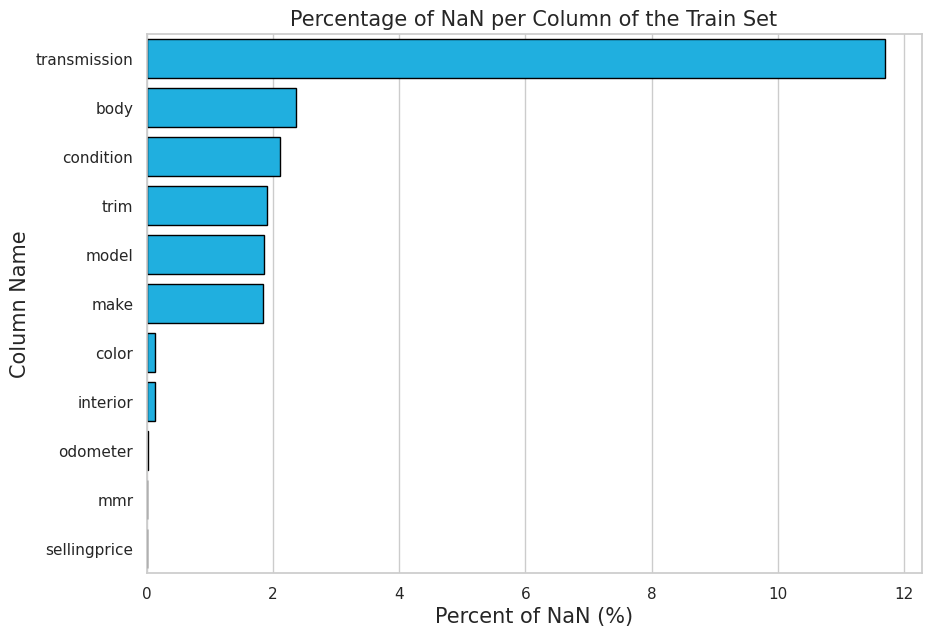

In [ ]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = dataset.columns[dataset.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    nan_percentage = round(dataset[i].isnull().sum()*100/len(dataset), 2)
    percent_nan.append(nan_percentage)

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(
    by=["Percent_NaN"],
    ascending=False,
    inplace=True
)

# Define figure parameters
sns.set(rc={"figure.figsize":(10, 7)})
sns.set_style("whitegrid")
fontsize=15

# Plot results
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="deepskyblue"
)

p.set_title("Percentage of NaN per Column of the Train Set", fontsize=fontsize)
p.set_xlabel("Percent of NaN (%)", fontsize=fontsize)
p.set_ylabel("Column Name", fontsize=fontsize);

In [ ]:
tab

,Column,Percent_NaN
4,transmission,11.69
3,body,2.36
5,condition,2.12
2,trim,1.91
1,model,1.86
0,make,1.84
7,color,0.13
8,interior,0.13
6,odometer,0.02
9,mmr,0.01


In [ ]:
dataset.isna().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
state,0
condition,11820
odometer,94
color,749


##3.4. Numerical Features

###3.4.1 Explore and Clean Numerical Features

In [ ]:
dataset_num = dataset.select_dtypes(exclude=['object'])
dataset_num.head()

,year,condition,odometer,mmr,sellingprice
0,2015,5.0,16639.0,20500.0,21500.0
1,2015,5.0,9393.0,20800.0,21500.0
2,2014,45.0,1331.0,31900.0,30000.0
3,2015,41.0,14282.0,27500.0,27750.0
4,2014,43.0,2641.0,66000.0,67000.0


In [ ]:
dataset_num.shape

(558837, 5)

###3.4.2. Distribution of Numerical Feature

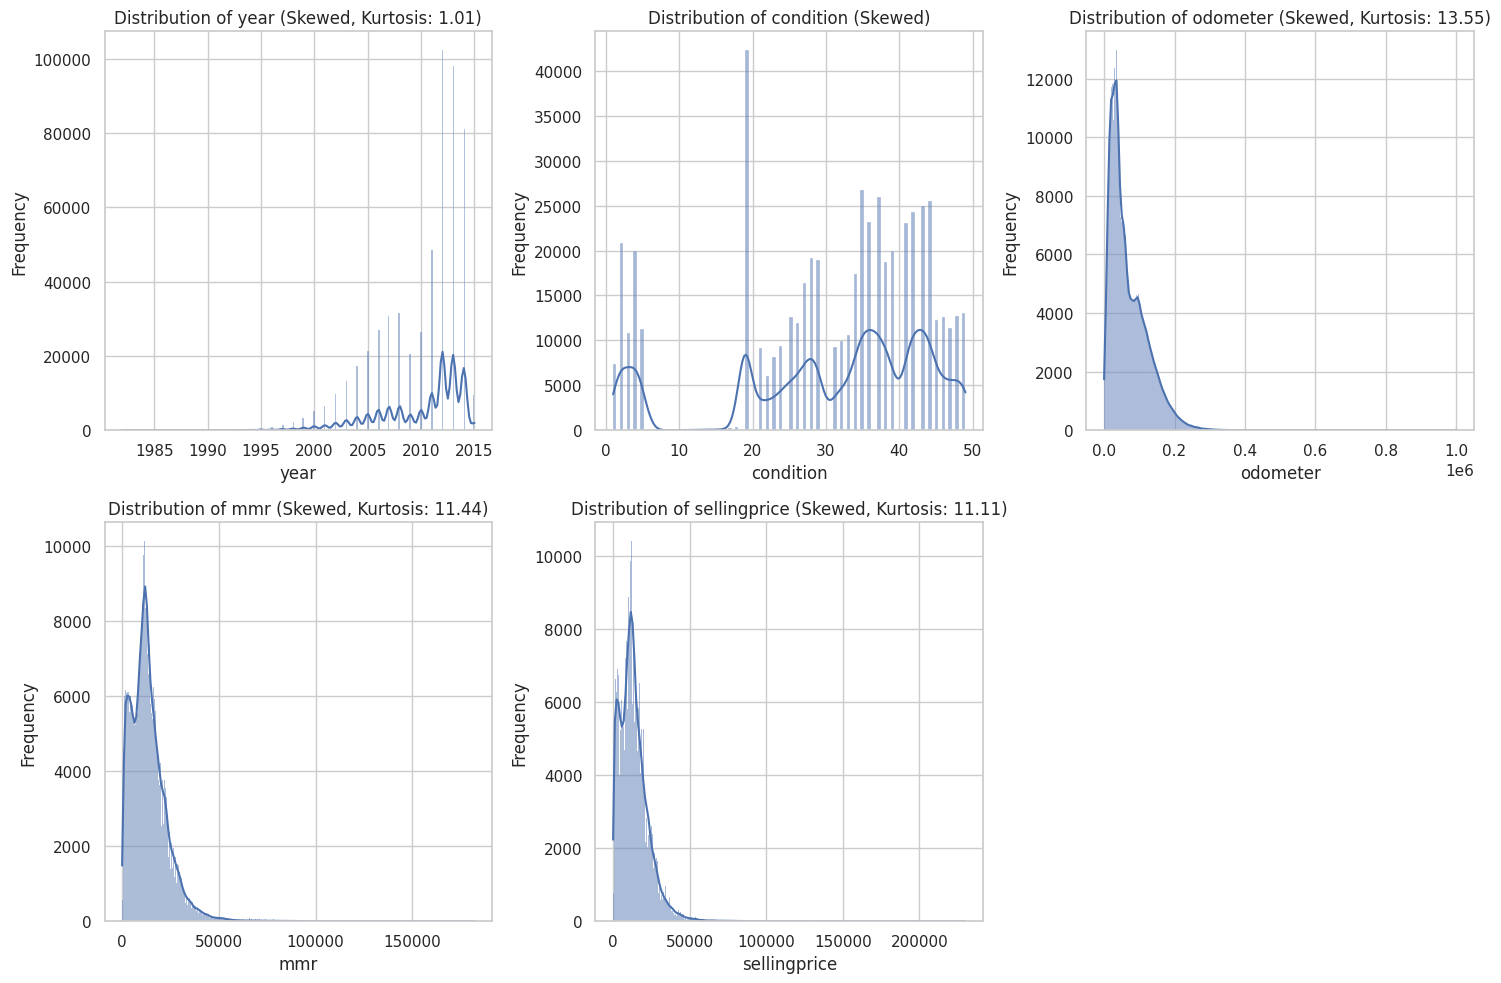

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Set the style for the plots
sns.set(style="whitegrid")

# Get the list of numerical columns
numerical_cols = dataset_num.columns

# Determine the number of rows and columns for the subplots
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Plot the distribution for each numerical column using histplot with kde
for i, col in enumerate(numerical_cols):
    sns.histplot(data=dataset_num, x=col, kde=True, ax=axes[i]) # Use histplot with kde

    # Calculate skewness and kurtosis
    col_skew = skew(dataset_num[col].dropna())
    col_kurtosis = kurtosis(dataset_num[col].dropna())

    # Determine distribution type based on skewness and kurtosis
    dist_type = "Approximately Normal"
    if abs(col_skew) > 0.5: # A common threshold for moderate skewness
        dist_type = "Skewed"
    if abs(col_kurtosis) > 1: # A common threshold for kurtosis indicating peaked or flat distribution
        dist_type += f", Kurtosis: {col_kurtosis:.2f}"


    axes[i].set_title(f'Distribution of {col} ({dist_type})')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Insight dari Distribusi Fitur Numerik

Berdasarkan plot distribusi fitur numerik (`year`, `condition`, `odometer`, `mmr`, dan `sellingprice`), terlihat bahwa `year` miring ke kanan dengan fokus pada tahun-tahun terbaru, sementara `condition` menunjukkan pola multimodal. Fitur `odometer`, `mmr`, dan `sellingprice` semuanya sangat miring ke kanan (right-skewed) dan memiliki kurtosis tinggi, mengindikasikan konsentrasi data pada nilai rendah dan adanya outlier pada nilai tinggi, yang merupakan karakteristik umum data jarak tempuh dan harga.

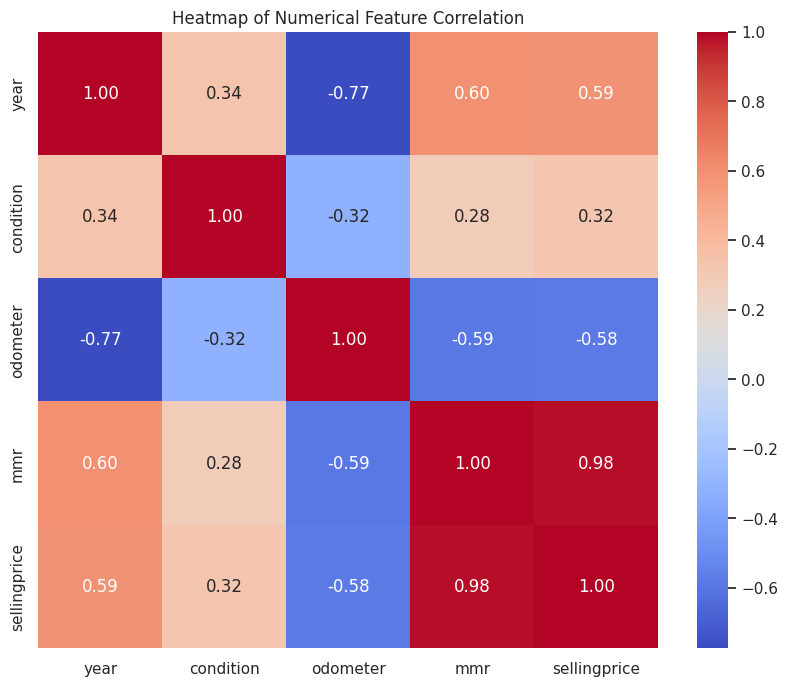

In [ ]:
# Calculate the correlation matrix
correlation_matrix = dataset_num.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Feature Correlation')
plt.show()

###3.4.3. Fill Missing Value

In [ ]:
# Fill missing values in specified numerical columns with their median
cols_to_fill = ['condition', 'odometer', 'mmr', 'sellingprice']
dataset_num_imputed = dataset_num.copy()

for col in cols_to_fill:
    # Get the number of missing values before filling
    missing_count_before = dataset_num[col].isnull().sum()

    median_value = dataset_num[col].median()
    dataset_num_imputed[col].fillna(median_value, inplace=True)
    print(f"Filled {missing_count_before} missing values in '{col}' with the median ({median_value}).")

# Verify that there are no more missing values in these columns
print("\nMissing values after filling:")
print(dataset_num_imputed[cols_to_fill].isnull().sum())

Filled 11820 missing values in 'condition' with the median (35.0).
Filled 94 missing values in 'odometer' with the median (52254.0).
Filled 38 missing values in 'mmr' with the median (12250.0).
Filled 12 missing values in 'sellingprice' with the median (12100.0).

Missing values after filling:
condition       0
odometer        0
mmr             0
sellingprice    0
dtype: int64


/tmp/ipython-input-799184431.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_num_imputed[col].fillna(median_value, inplace=True)


###4.4.4 Difference in Ditrubution before and after imputation

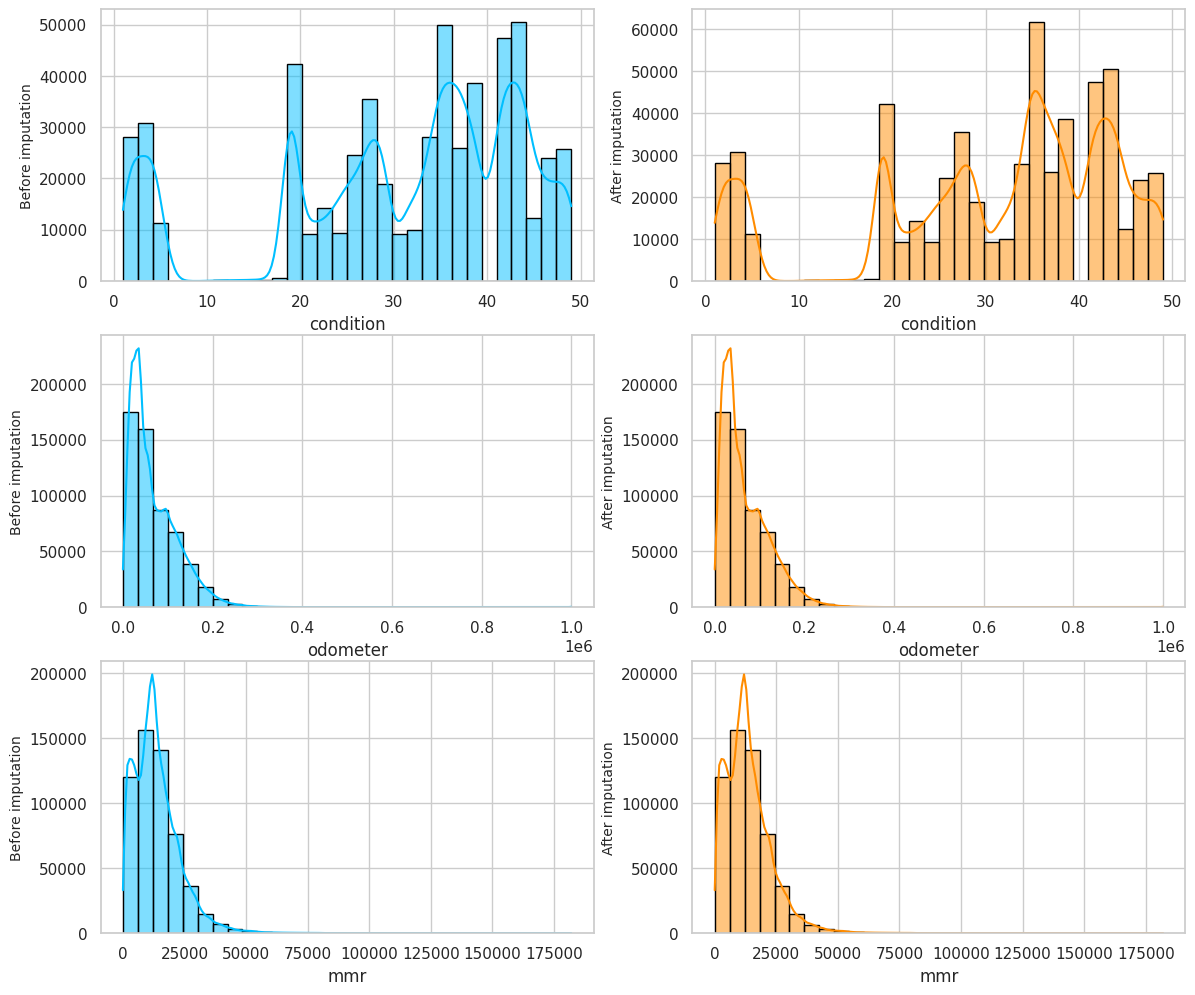

In [ ]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 2)
fontsize=10
# Plot the results
for feature, fig_pos in zip(["condition", "odometer", "mmr"], [0, 1, 2]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(
        ax=axes[fig_pos, 0],
        x=dataset_num[feature],
        kde=True,
        bins=30,
        color="deepskyblue",
        edgecolor="black"
    )
    p.set_ylabel(f"Before imputation", fontsize=fontsize)

    # after imputation
    q = sns.histplot(
        ax=axes[fig_pos, 1],
        x=dataset_num_imputed[feature],
        kde=True,
        bins=30,
        color="darkorange",
        edgecolor="black"
    )
    q.set_ylabel(f"After imputation", fontsize=fontsize)

### Perbedaan Distribusi Sebelum dan Sesudah Imputasi

Grafik perbandingan distribusi fitur numerik sebelum dan sesudah imputasi (`condition`, `odometer`, dan `mmr`) menunjukkan bahwa imputasi nilai yang hilang dengan median memiliki efek minimal pada bentuk keseluruhan distribusi.

*   Untuk `condition`, meskipun ada beberapa nilai yang hilang yang diisi, pola multimodal distribusi tetap terlihat serupa. Pengisian dengan median (35.0) menambahkan frekuensi pada nilai tersebut, tetapi tidak secara drastis mengubah bentuk distribusi awal.
*   Untuk `odometer` dan `mmr`, yang memiliki jumlah nilai hilang yang sangat sedikit (0.02% dan 0.01%), imputasi dengan median hampir tidak menimbulkan perubahan yang terlihat pada distribusi yang sangat miring ke kanan. Puncak distribusi tetap berada pada nilai rendah, dan ekor distribusi tetap memanjang ke kanan.

Secara umum, karena persentase nilai yang hilang pada fitur-fitur ini relatif kecil, strategi imputasi dengan median berhasil menjaga bentuk distribusi asli data, yang penting agar tidak menimbulkan bias pada analisis atau model selanjutnya.

###3.4.5 Heatmap Numerical Feature

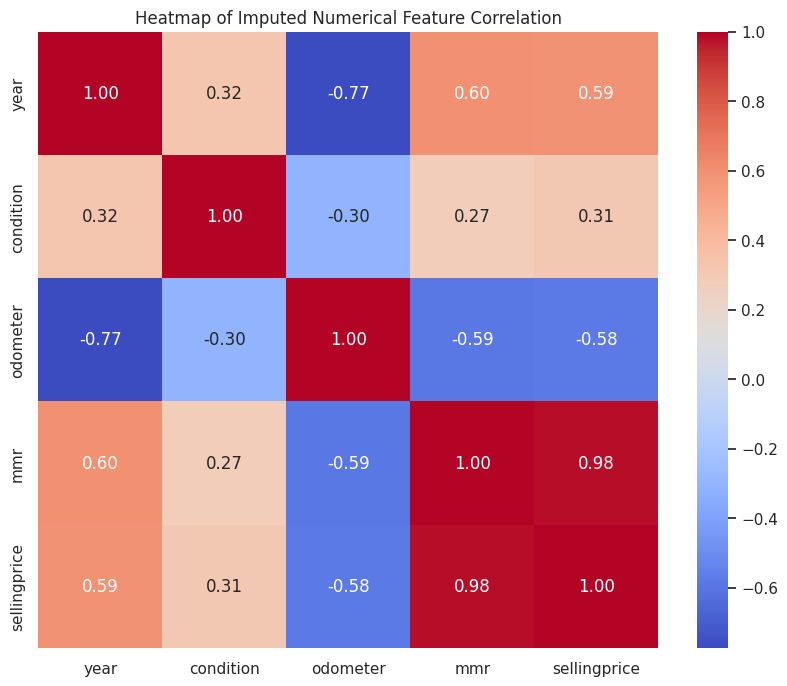

In [ ]:
# Calculate the correlation matrix for the imputed numerical dataset
correlation_matrix_imputed = dataset_num_imputed.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_imputed, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Imputed Numerical Feature Correlation')
plt.show()

###3.4.6. Correlation to Sellingprice

In [ ]:
# Calculate correlation with 'SalePrice' for numerical features
correlation_with_saleprice = dataset_num_imputed.corr()["sellingprice"][:-1]

# Identify strongly correlated features (correlation coefficient >= 0.5)
strong_correlations = (
    correlation_with_saleprice[abs(correlation_with_saleprice) >= 0.5]
    .sort_values(ascending=False)
)
print(f"{len(strong_correlations)} strongly correlated features with SellingPrice:")
print(strong_correlations)

print("\n-------------------------#######-------------------------\n")

# Identify moderately correlated features (0.3 <= correlation coefficient < 0.5)
moderate_correlations = (
    correlation_with_saleprice[(abs(correlation_with_saleprice) < 0.5) \
    & (abs(correlation_with_saleprice) >= 0.3)]
    .sort_values(ascending=False)
)
print(f"{len(moderate_correlations)} moderately correlated features with SellingPrice:")
print(moderate_correlations)

3 strongly correlated features with SellingPrice:
mmr         0.983634
year        0.586474
odometer   -0.582267
Name: sellingprice, dtype: float64

-------------------------#######-------------------------

1 moderately correlated features with SellingPrice:
condition    0.31312
Name: sellingprice, dtype: float64


In [ ]:
strong_correlations.index.tolist()

['mmr', 'year', 'odometer']

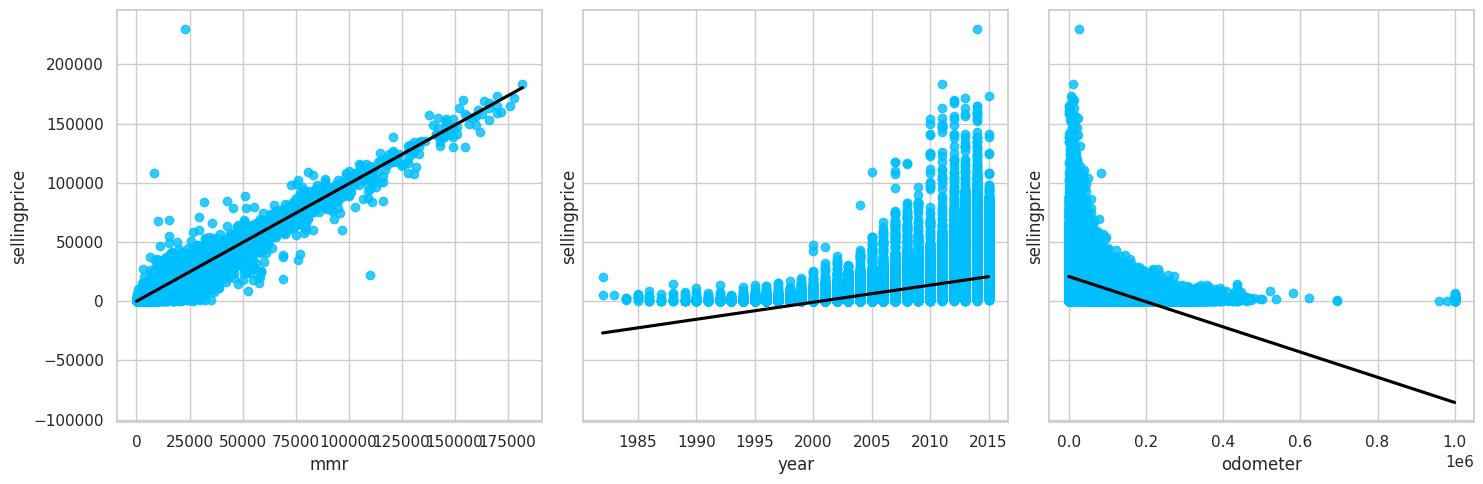

In [ ]:
# Features with high correlation (higher than 0.5)
strong_features = strong_correlations.index.tolist()
strong_features.append("sellingprice")
df_strong_features = dataset_num_imputed.loc[:, strong_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(strong_features) -1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(strong_features) - 1)


fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i in range(len(strong_features) - 1):
    sns.regplot(
        x=strong_features[i],
        y="sellingprice",
        data=df_strong_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(strong_features[i]) # Set xlabel for each subplot


# Turn off any unused subplots
for i in range(len(strong_features) - 1, len(axes)):
    axes[i].set_axis_off()


plt.tight_layout()
plt.show()

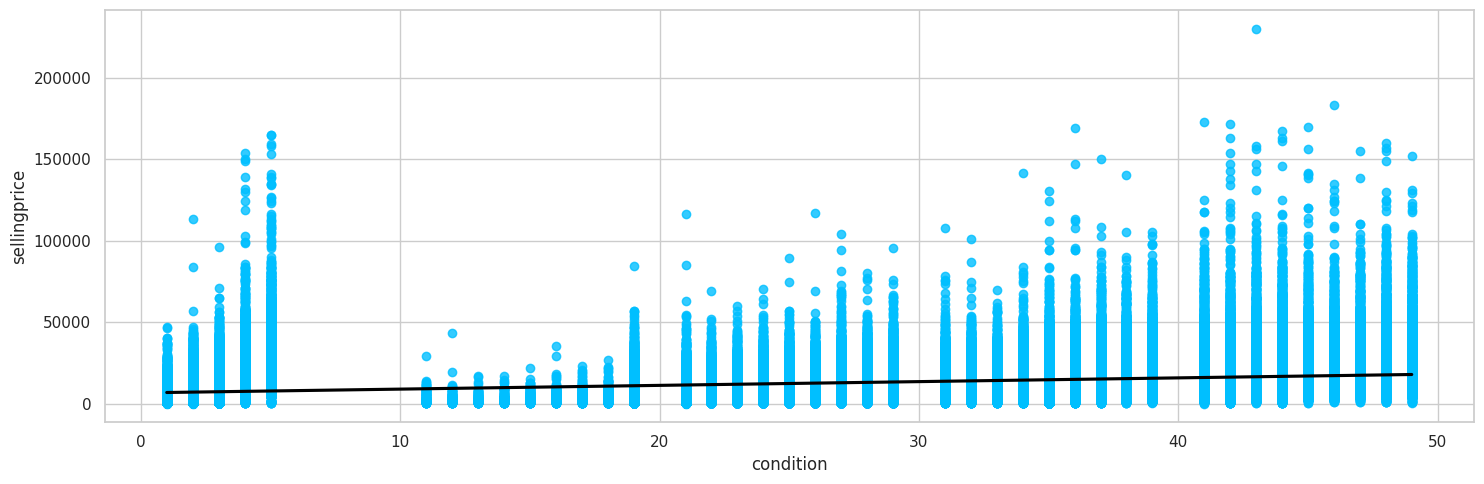

In [ ]:
# Features with moderate correlation (0.3 <= correlation coefficient < 0.5)
moderate_features = moderate_correlations.index.tolist()
moderate_features.append("sellingprice")
df_moderate_features = dataset_num_imputed.loc[:, moderate_features]

sns.set_style("whitegrid")  # define figures style

# Calculate the number of rows and columns for subplots
n_rows = (len(moderate_features) - 1 + 2) // 3  # Ensure enough rows
n_cols = min(3, len(moderate_features) - 1)

fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(15, 5 * n_rows),
    sharey=True
)

# Flatten the axes array for easier iteration
if n_rows * n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes] # Wrap the single Axes object in a list for consistent iteration

for i in range(len(moderate_features) - 1):
    sns.regplot(
        x=moderate_features[i],
        y="sellingprice",
        data=df_moderate_features,
        ax=axes[i],
        scatter_kws={"color": "deepskyblue"},
        line_kws={"color": "black"},
    )
    axes[i].set_xlabel(moderate_features[i])  # Set xlabel for each subplot

# Turn off any unused subplots
for i in range(len(moderate_features) - 1, len(axes)):
    axes[i].set_axis_off()

plt.tight_layout()
plt.show()

##3.5. Categorical Features

###3.5.1 Explore and Clean Categorical Features

In [ ]:
# Categorical to Quantitative relationship

# categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"] # -->list comprehension
# for-loop
categorical_features = []
for feat, feat_type in zip(dataset.columns, dataset.dtypes):
    if feat_type == 'object':
       categorical_features.append(feat)

# Include target variable
categorical_features.append("sellingprice")

dataset_categ = dataset[categorical_features]

In [ ]:
dataset_categ.head()

,make,model,trim,body,transmission,state,color,interior,seller,sellingprice
0,Kia,Sorento,LX,SUV,automatic,ca,white,black,kia motors america inc,21500.0
1,Kia,Sorento,LX,SUV,automatic,ca,white,beige,kia motors america inc,21500.0
2,BMW,3 Series,328i SULEV,Sedan,automatic,ca,gray,black,financial services remarketing (lease),30000.0
3,Volvo,S60,T5,Sedan,automatic,ca,white,black,volvo na rep/world omni,27750.0
4,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,gray,black,financial services remarketing (lease),67000.0


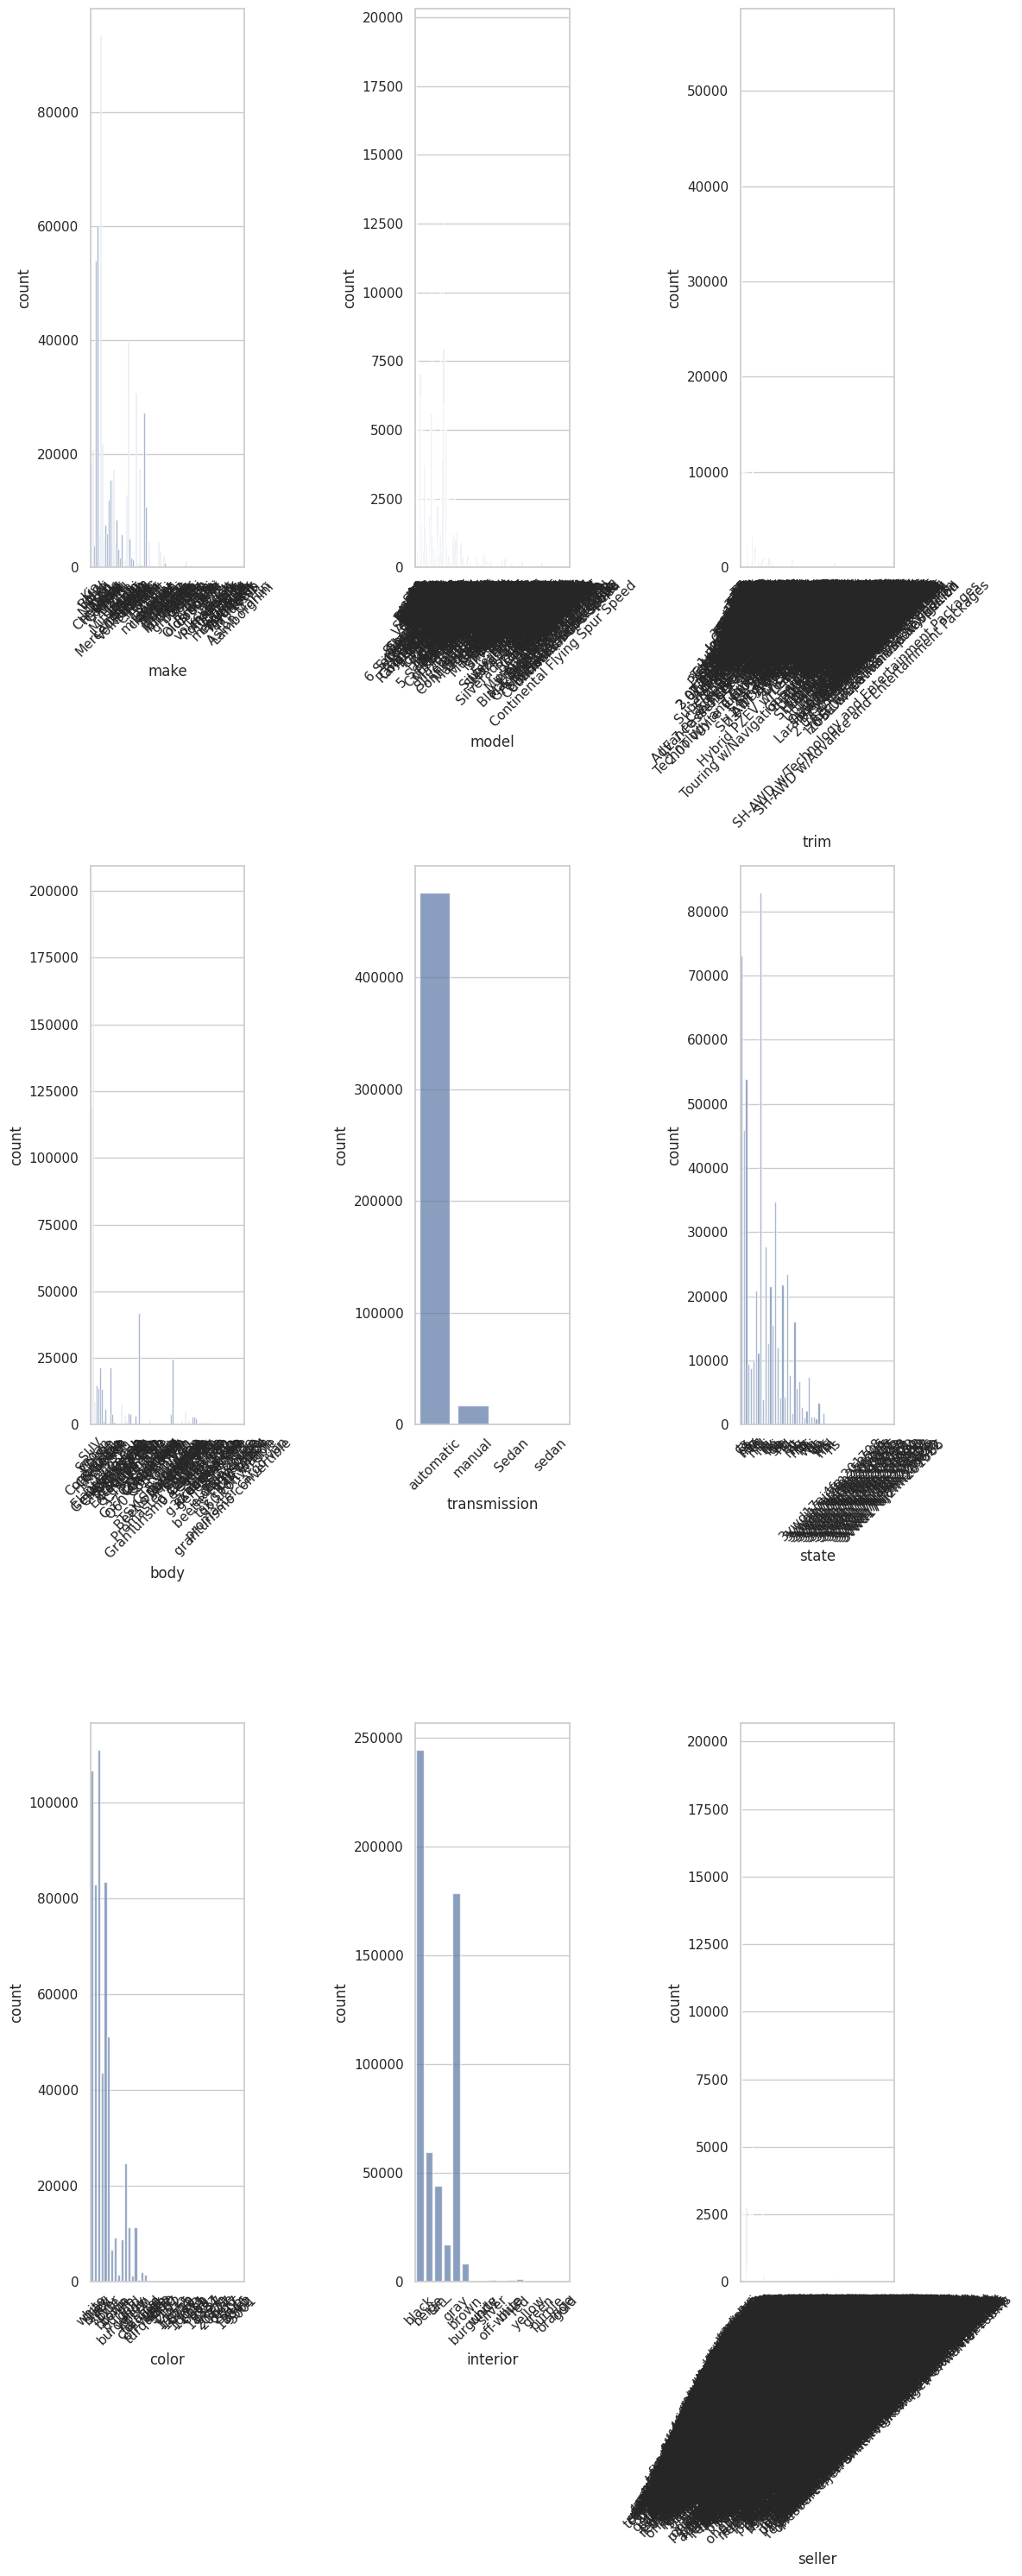

In [ ]:
# Countplot for each of the categorical features in the train set
fig, axes = plt.subplots(
    nrows=round(len(dataset_categ.columns) / 3),
    ncols=3,
    figsize=(12, 30)
)

for i, ax in enumerate(axes.flatten()):  # Iterate through flattened axes array
    if i < (len(dataset_categ.columns)-1): # -1 because we exclude SalePrice

        sns.countplot(
            x=dataset_categ.columns[i],
            alpha=0.7,
            data=dataset_categ,
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()

In [ ]:
# Calculate and print the number of unique categories for each categorical feature
for col in dataset_categ.columns:
    if col != 'sellingprice': # Exclude the target variable
        num_unique = dataset_categ[col].nunique()
        print(f"Column '{col}': {num_unique} unique categories")

Column 'make': 96 unique categories
Column 'model': 973 unique categories
Column 'trim': 1963 unique categories
Column 'body': 87 unique categories
Column 'transmission': 4 unique categories
Column 'state': 64 unique categories
Column 'color': 46 unique categories
Column 'interior': 17 unique categories
Column 'seller': 14263 unique categories


###3.5.2 Delete Data

In [ ]:
# Replace 'sedan' with NaN in the 'transmission' column
dataset_categ['transmission'] = dataset_categ['transmission'].replace('sedan', np.nan)
dataset_categ['transmission'] = dataset_categ['transmission'].replace('Sedan', np.nan)

print("Replaced 'sedan' with NaN in the 'transmission' column.")

Replaced 'sedan' with NaN in the 'transmission' column.


/tmp/ipython-input-3746715609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categ['transmission'] = dataset_categ['transmission'].replace('sedan', np.nan)
/tmp/ipython-input-3746715609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categ['transmission'] = dataset_categ['transmission'].replace('Sedan', np.nan)


In [ ]:
# Calculate and print the number of unique categories for each categorical feature
for col in dataset_categ.columns:
    if col != 'sellingprice': # Exclude the target variable
        num_unique = dataset_categ[col].nunique()
        print(f"Column '{col}': {num_unique} unique categories")

Column 'make': 96 unique categories
Column 'model': 973 unique categories
Column 'trim': 1963 unique categories
Column 'body': 87 unique categories
Column 'transmission': 2 unique categories
Column 'state': 64 unique categories
Column 'color': 46 unique categories
Column 'interior': 17 unique categories
Column 'seller': 14263 unique categories


###3.5.2. Fill Missing Value

In [ ]:
# Define the columns to fill with 'others'
dataset_categ_imputed = dataset_categ.copy()

# Fill missing values in specified categorical columns with 'others'
cols_to_fill_categorical = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

# Fill missing values in specified categorical columns with 'others'
for col in cols_to_fill_categorical:
    # Get the number of missing values before filling
    missing_count_before = dataset_categ[col].isnull().sum()

    dataset_categ_imputed[col].fillna('others', inplace=True)
    print(f"Filled {missing_count_before} missing values in '{col}' with 'others'.")

# Verify that there are no more missing values in these columns
print("\nMissing values after filling:")
print(dataset_categ_imputed[cols_to_fill_categorical].isnull().sum())

/tmp/ipython-input-4158891840.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_categ_imputed[col].fillna('others', inplace=True)


Filled 10301 missing values in 'make' with 'others'.
Filled 10399 missing values in 'model' with 'others'.
Filled 10651 missing values in 'trim' with 'others'.
Filled 13195 missing values in 'body' with 'others'.
Filled 65378 missing values in 'transmission' with 'others'.
Filled 749 missing values in 'color' with 'others'.
Filled 749 missing values in 'interior' with 'others'.

Missing values after filling:
make            0
model           0
trim            0
body            0
transmission    0
color           0
interior        0
dtype: int64


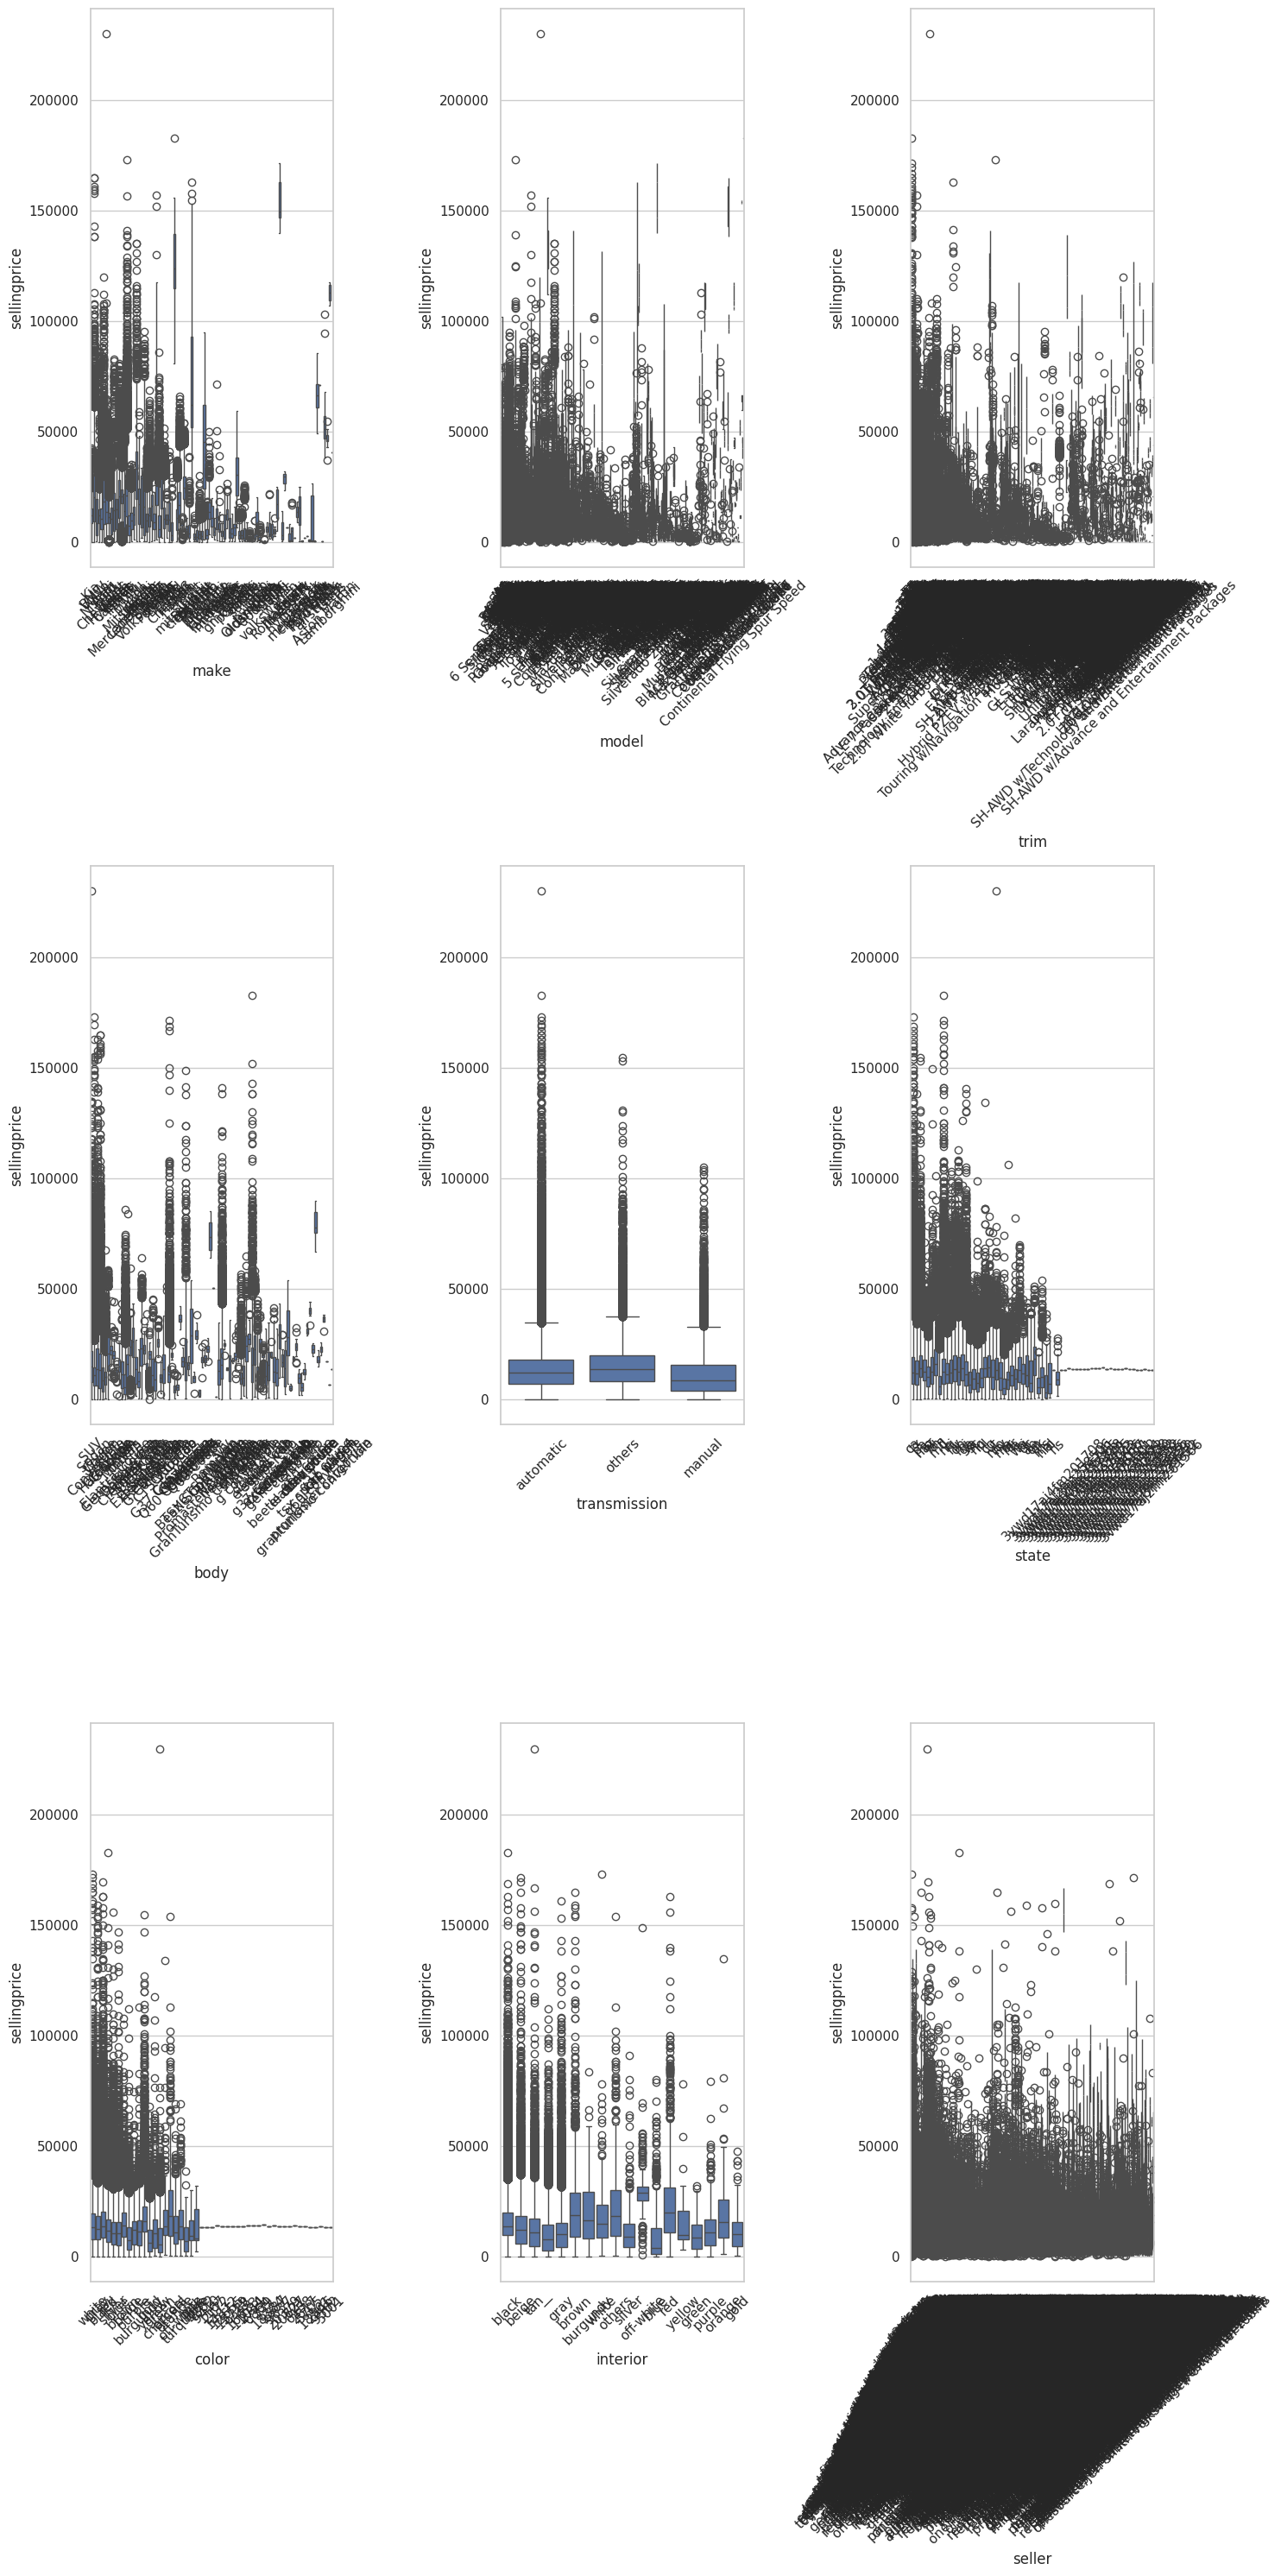

In [ ]:
# With the boxplot we can see the variation of the target 'SalePrice'
# in each of the categorical features

fig, axes = plt.subplots(
    nrows=round(len(dataset_categ_imputed.columns)/3),
    ncols=3,
    figsize=(15, 30)
)

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(dataset_categ_imputed.columns) - 1:

        sns.boxplot(
            x=dataset_categ_imputed.columns[i],
            y="sellingprice",
            data=dataset_categ_imputed,
            ax=ax
        )

        ax.tick_params(
            axis='x',
            rotation=45
        )
    else:
        ax.set_axis_off() # Hide empty subplots

fig.tight_layout()
plt.show()

##3.5. Combine Numerical dan Categorical Features

In [ ]:
# Drop the 'sellingprice' column from dataset_categ_imputed
if 'sellingprice' in dataset_categ_imputed.columns:
    dataset_categ_imputed = dataset_categ_imputed.drop(columns=['sellingprice'])
    print("The 'sellingprice' column has been removed from dataset_categ_imputed.")
else:
    print("The 'sellingprice' column does not exist in dataset_categ_imputed.")

The 'sellingprice' column has been removed from dataset_categ_imputed.


In [ ]:
dataset_new = dataset_num_imputed.join(dataset_categ_imputed)
dataset_new.head()

,year,condition,odometer,mmr,sellingprice,make,model,trim,body,transmission,state,color,interior,seller
0,2015,5.0,16639.0,20500.0,21500.0,Kia,Sorento,LX,SUV,automatic,ca,white,black,kia motors america inc
1,2015,5.0,9393.0,20800.0,21500.0,Kia,Sorento,LX,SUV,automatic,ca,white,beige,kia motors america inc
2,2014,45.0,1331.0,31900.0,30000.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,gray,black,financial services remarketing (lease)
3,2015,41.0,14282.0,27500.0,27750.0,Volvo,S60,T5,Sedan,automatic,ca,white,black,volvo na rep/world omni
4,2014,43.0,2641.0,66000.0,67000.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,gray,black,financial services remarketing (lease)


In [ ]:
# Store the sellingprice column
sellingprice = dataset_new['sellingprice']

# Drop the sellingprice column
dataset_new = dataset_new.drop(columns=['sellingprice'])

# Add sellingprice back at the end
dataset_new['sellingprice'] = sellingprice

print("The 'sellingprice' column has been moved to the end of the DataFrame.")
display(dataset_new.head())

The 'sellingprice' column has been moved to the end of the DataFrame.


,year,condition,odometer,mmr,make,model,trim,body,transmission,state,color,interior,seller,sellingprice
0,2015,5.0,16639.0,20500.0,Kia,Sorento,LX,SUV,automatic,ca,white,black,kia motors america inc,21500.0
1,2015,5.0,9393.0,20800.0,Kia,Sorento,LX,SUV,automatic,ca,white,beige,kia motors america inc,21500.0
2,2014,45.0,1331.0,31900.0,BMW,3 Series,328i SULEV,Sedan,automatic,ca,gray,black,financial services remarketing (lease),30000.0
3,2015,41.0,14282.0,27500.0,Volvo,S60,T5,Sedan,automatic,ca,white,black,volvo na rep/world omni,27750.0
4,2014,43.0,2641.0,66000.0,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,gray,black,financial services remarketing (lease),67000.0


### Insight dari Fitur Numerik dan Kategorikal

Dari analisis fitur numerik, kita menemukan bahwa distribusi `year`, `odometer`, `mmr`, dan `sellingprice` cenderung miring ke kanan, dengan banyak data di nilai rendah dan beberapa outlier di nilai tinggi. Fitur `condition` memiliki beberapa puncak distribusi (multimodal). Korelasi menunjukkan bahwa `mmr` punya hubungan sangat kuat dengan `sellingprice`, sementara `year` berkorelasi positif cukup kuat dan `odometer` berkorelasi negatif cukup kuat dengan `sellingprice`. Imputasi nilai hilang dengan median tidak banyak mengubah bentuk distribusi fitur numerik.

Pada fitur kategorikal, `seller`, `trim`, dan `model` memiliki jumlah kategori unik yang sangat banyak. Visualisasi menunjukkan bagaimana distribusi kategori dan hubungannya dengan `sellingprice`. Uji Chi-Square menunjukkan hubungan signifikan antar hampir semua pasangan fitur kategorikal. Penanganan nilai hilang dengan 'others' membantu menjaga data.

#4.&nbsp;Feature Engineering

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import pandas as pd

In [ ]:
# Save sellingprice so it won't be scaled
sellingprice = dataset_new['sellingprice']

##4.1. One-Hot Encoding

In [ ]:
# --- One-Hot Encoding for the 'transmission' column ---
if 'transmission' in dataset_new.columns:
    ohe = OneHotEncoder(sparse_output=False, drop=None)
    transmission_encoded = ohe.fit_transform(dataset_new[['transmission']])
    transmission_df = pd.DataFrame(
        transmission_encoded,
        columns=[f"transmission_{cat}" for cat in ohe.categories_[0]],
        index=dataset_new.index
    )
    dataset_new = pd.concat([dataset_new.drop(columns=['transmission']), transmission_df], axis=1)


##4.2. Label Encoding

In [ ]:
# --- Label Encoding for other categorical columns ---
categorical_cols = dataset_new.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    dataset_new[col] = le.fit_transform(dataset_new[col])

##4.3. Feature Scalling

In [ ]:
# --- Feature Scaling for all columns except 'sellingprice' ---
scaler = StandardScaler()
cols_to_scale = dataset_new.columns.drop('sellingprice')
dataset_new[cols_to_scale] = scaler.fit_transform(dataset_new[cols_to_scale])

In [ ]:
# Put 'sellingprice' back to the last position
dataset_new['sellingprice'] = sellingprice

# Save the final result
dataset_feature = dataset_new

In [ ]:
# Display the result
dataset_feature.head()

,year,condition,odometer,mmr,make,model,trim,body,state,color,interior,seller,sellingprice,transmission_automatic,transmission_manual,transmission_others
0,1.250630,-1.940793,-0.967860,0.695349,0.043228,1.269950,0.100668,-0.275054,-1.140992,1.142899,-0.691481,0.001227,21500.0,0.417417,-0.180031,-0.363991
1,1.250630,-1.940793,-1.103567,0.726342,0.043228,1.269950,0.100668,-0.275054,-1.140992,1.142899,-0.912532,0.001227,21500.0,0.417417,-0.180031,-0.363991
2,0.998541,1.072405,-1.254557,1.873079,-1.185784,-1.573956,-1.512750,-0.221733,-1.140992,-0.401279,-0.691481,-0.545255,30000.0,0.417417,-0.180031,-0.363991
3,1.250630,0.771085,-1.012003,1.418517,1.623386,0.998267,1.005536,-0.221733,-1.140992,1.142899,-0.691481,1.621260,27750.0,0.417417,-0.180031,-0.363991
4,0.998541,0.921745,-1.230022,5.395938,-1.185784,-1.429351,-1.027597,-0.221733,-1.140992,-0.401279,-0.691481,-0.545255,67000.0,0.417417,-0.180031,-0.363991


#5.&nbsp;Preparing Data for Modelling

##5.1. Variabel Target

##5.2 Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset_feature.drop(columns=['sellingprice'])
y = dataset_feature['sellingprice']

# Split dataset 80% train dan 20% test secara random
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Simpan hasil data train tanpa kolom sellingprice
dataset_train_x = X_train.copy()
dataset_train_x.head()

,year,condition,odometer,mmr,make,model,trim,body,state,color,interior,seller,transmission_automatic,transmission_manual,transmission_others
295711,0.242275,0.394435,-0.577763,1.046602,-0.190870,0.240184,2.230831,-0.221733,1.369376,1.142899,-0.691481,0.506919,0.417417,-0.180031,-0.363991
423865,0.242275,0.243775,-0.494590,0.891637,-0.951687,1.199838,0.062307,-1.341470,0.503732,-1.243558,0.413774,1.541401,0.417417,-0.180031,-0.363991
329940,1.250630,1.373725,-1.145912,4.342180,-0.483492,1.177928,-0.601113,-1.608074,-1.140992,1.142899,-0.691481,1.731097,0.417417,-0.180031,-0.363991
439952,-0.766079,-0.132874,0.288882,-0.970519,1.564862,0.056141,-0.880922,-0.221733,0.590296,1.142899,0.413774,-1.315587,0.417417,-0.180031,-0.363991
489961,-0.766079,-2.166783,0.932676,-0.598604,-1.185784,-1.573956,-1.492442,2.017739,-0.881299,-1.243558,-0.912532,-1.555901,0.417417,-0.180031,-0.363991


In [ ]:
# Simpan hasil data train objective (kolom sellingprice saja)
dataset_train_y = y_train.copy()
dataset_train_y.head()

,sellingprice
295711,25000.0
423865,23750.0
329940,57750.0
439952,4500.0
489961,8100.0


In [ ]:
dataset_train_x.isna().sum()

,0
year,0
condition,0
odometer,0
mmr,0
make,0
model,0
trim,0
body,0
state,0
color,0


In [ ]:
# Simpan hasil data test tanpa kolom sellingprice
dataset_test_x = X_test.copy()
dataset_test_x.head()

,year,condition,odometer,mmr,make,model,trim,body,state,color,interior,seller,transmission_automatic,transmission_manual,transmission_others
311497,0.998541,-2.016123,-0.876689,-0.032984,-0.951687,0.016703,0.075846,-0.221733,-0.967864,1.142899,-0.691481,-0.367353,0.417417,-0.180031,-0.363991
171592,-1.774433,0.017785,0.213406,-0.800058,-0.776114,0.849279,0.764087,-0.435017,-0.102219,1.423658,-0.691481,1.330327,-2.395686,-0.180031,2.747323
55288,-0.766079,0.243775,-0.049056,-0.660590,0.921094,-0.228688,-0.188168,-1.714715,0.244038,0.721759,-0.691481,-1.121714,0.417417,-0.180031,-0.363991
190760,0.242275,0.921745,-0.836854,-0.306755,1.506338,-0.772054,0.003637,-0.221733,-0.967864,-1.243558,-0.912532,1.711193,0.417417,-0.180031,-0.363991
180999,0.494364,0.319105,-0.783496,0.901968,0.218801,-0.623066,-0.887692,-0.221733,1.023118,-1.243558,-0.249379,0.324103,-2.395686,-0.180031,2.747323


In [ ]:
# Simpan hasil data test objective (kolom sellingprice saja)
dataset_test_y = y_test.copy()
dataset_test_y.head()

,sellingprice
311497,13800.0
171592,6300.0
55288,8000.0
190760,11400.0
180999,23300.0


#6.&nbsp;Modelling

##6.1. Models and Metrics Selection

##6.2. Hyperparameters Tuning and Model Optimization

In [ ]:
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
# Let's define a function for each metrics
# R²
def rsqr_score(test, pred):
    """Calculate R squared score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred):
    """Print calculated score

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """

    print(f"- Regressor: {regr.__class__.__name__}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

model_list = []
r2_list = []
rmse_list = []


###6.2.1. Ridge regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Bersihkan NaN pada X_train dan y_train
train_df_clean = X_train.copy()
train_df_clean["target"] = y_train

# Drop baris yang targetnya NaN
train_df_clean = train_df_clean.dropna(subset=["target"])

# Pisah X_train dan y_train yang sudah bersih
X_train_clean = train_df_clean.drop(columns=["target"])
y_train_clean = train_df_clean["target"]

if X_train_clean.isna().sum().sum() > 0:
    print("⚠ Ada NaN di fitur, otomatis diisi dengan median.")
    X_train_clean = X_train_clean.fillna(X_train_clean.median())

#  Definisikan hyperparameter
alphas = np.logspace(-5, 5, 50).tolist()
tuned_parameters = {"alpha": alphas}

# GridSearchCV
ridge_cv = GridSearchCV(
    Ridge(),
    tuned_parameters,
    cv=10,
    n_jobs=-1,
    verbose=1,
    scoring="r2"
)

ridge_cv.fit(X_train_clean, y_train_clean)

# Print hasil terbaik
print(f"Best hyperparameters: {ridge_cv.best_params_}")
print(f"Best R² (train CV): {ridge_cv.best_score_:.4f}")

#  Model final
ridge_mod = Ridge(alpha=ridge_cv.best_params_["alpha"])
ridge_mod.fit(X_train_clean, y_train_clean)

# Prediksi di X_test (juga dibersihkan dari NaN kalau ada)
X_test_clean = X_test.fillna(X_test.median())
y_pred = ridge_mod.predict(X_test_clean)

#  Hasil evaluasi
print(f"- {ridge_mod.__class__.__name__}")
print(f"R²: {rsqr_score(y_test, y_pred):.4f}")
print(f"RMSE: {rmse_score(y_test, y_pred):.4f}")

# Simpan hasil
model_list.append(ridge_mod.__class__.__name__)
r2_list.append(round(rsqr_score(y_test, y_pred), 4))
rmse_list.append(round(rmse_score(y_test, y_pred), 4))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 1e-05}
Best R² (train CV): 0.9696
- Ridge
R²: 0.9710
RMSE: 1648.8241


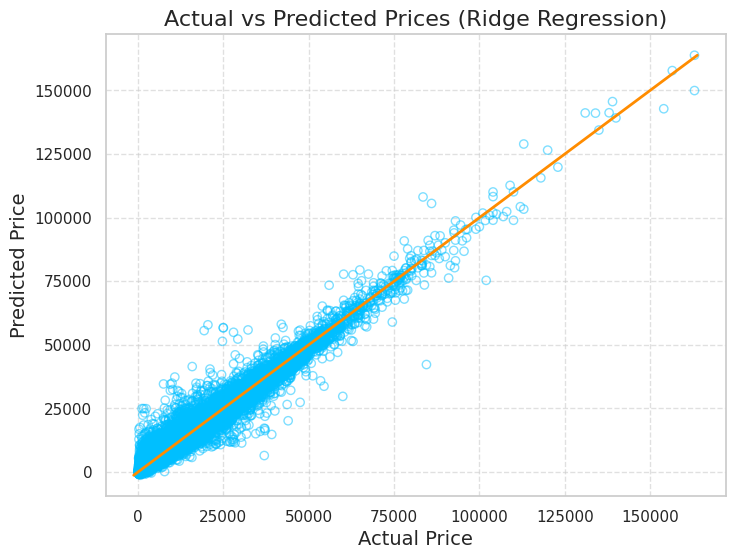

In [ ]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Price
plt.figure(figsize=(8, 6))
plt.title("Actual vs Predicted Prices (Ridge Regression)", fontsize=16)

plt.scatter(y_test, y_pred,
            color="deepskyblue", marker="o", facecolors="none", alpha=0.5)

# Garis referensi 45 derajat
min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], "darkorange", lw=2)

plt.xlabel("Actual Price", fontsize=14)
plt.ylabel("Predicted Price", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

###6.2.2. Lasso regression

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters: {'alpha': 0.011513953993264481}
Best R² (train): 0.9696054325444724


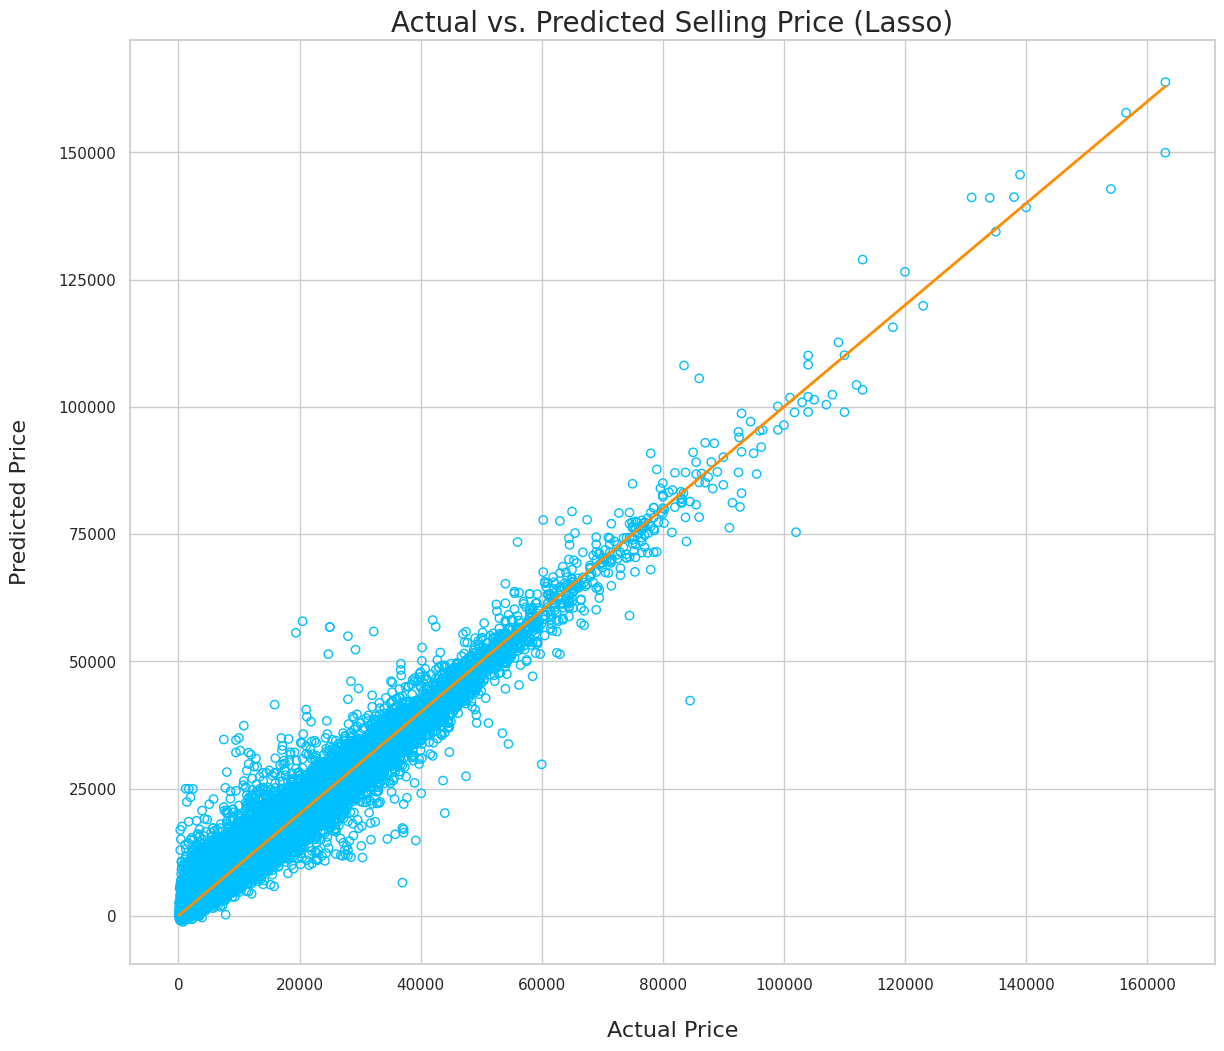

In [ ]:
from sklearn.linear_model import Lasso

alphas = np.logspace(-5, 5, 50).tolist()
#lasso_params = {"alpha": alphas, "max_iter": [1000, 5000, 10000]}
lasso_params = {"alpha": alphas}

lasso_cv = GridSearchCV(Lasso(), lasso_params, cv=10, n_jobs=-1, verbose=1)
lasso_cv.fit(dataset_train_x, dataset_train_y)

print(f"Best hyperparameters: {lasso_cv.best_params_}")
print(f"Best R² (train): {lasso_cv.best_score_}")

lasso_mod = Lasso(**lasso_cv.best_params_)
lasso_mod.fit(dataset_train_x, dataset_train_y)

y_pred = lasso_mod.predict(dataset_test_x)

model_list.append(lasso_mod.__class__.__name__)
r2_list.append(round(rsqr_score(dataset_test_y, y_pred), 4))
rmse_list.append(round(rmse_score(dataset_test_y, y_pred), 4))

plt.figure()
plt.title("Actual vs. Predicted Selling Price (Lasso)", fontsize=20)
plt.scatter(dataset_test_y, y_pred, color="deepskyblue", marker="o", facecolors="none")
plt.plot([dataset_test_y.min(), dataset_test_y.max()],
         [dataset_test_y.min(), dataset_test_y.max()],
         "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

###6.2.3. XGBoost regression

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best R² (train): 0.9659328756885005


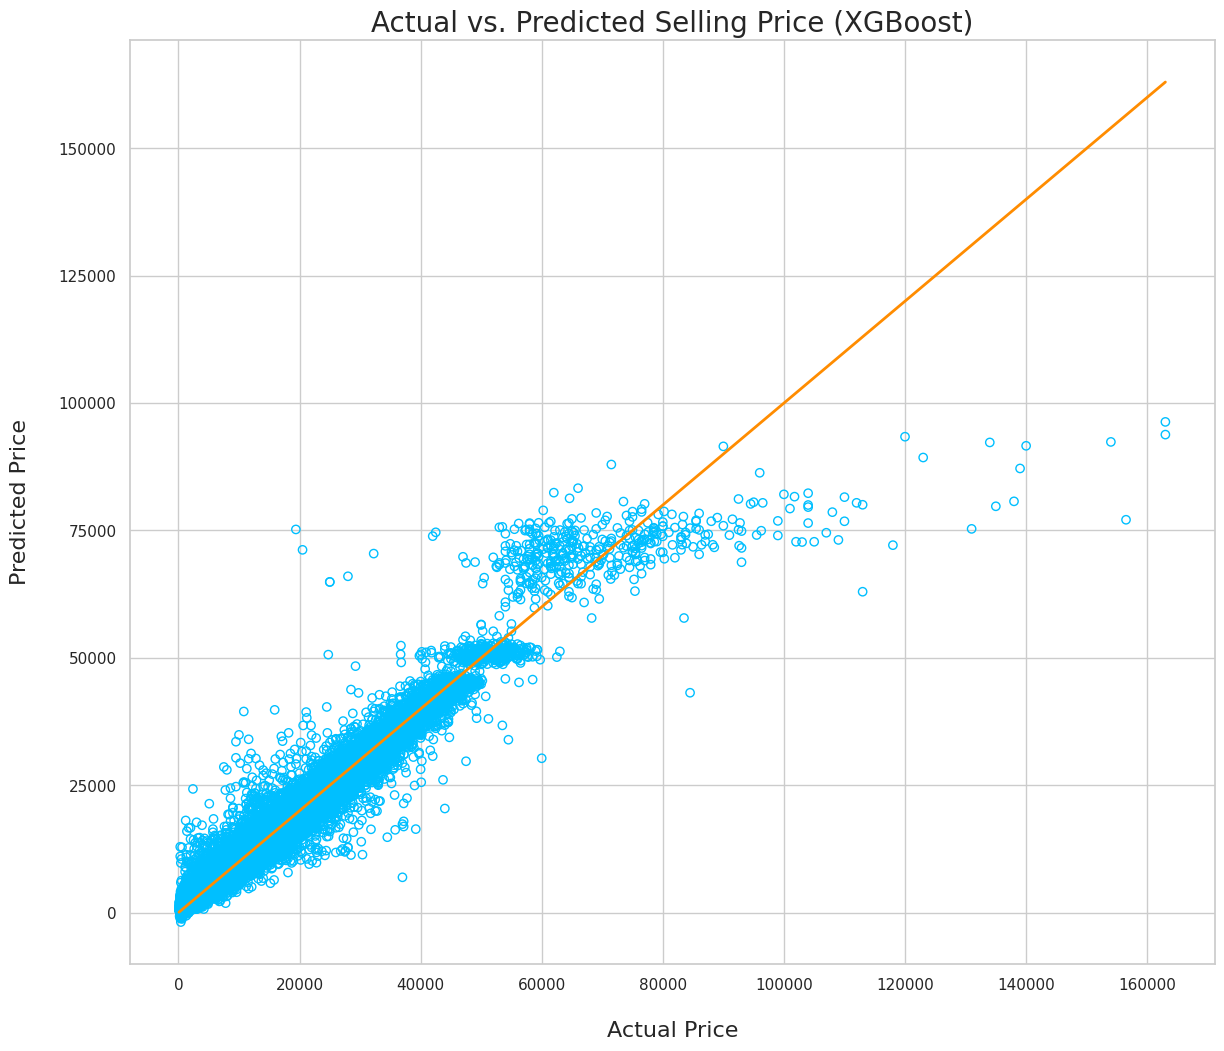

In [ ]:
xgb_params = {
    "max_depth": [3],
    "colsample_bytree": [0.3, 0.7],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [100, 500]
}

xgb_cv = GridSearchCV(XGBRegressor(objective="reg:squarederror", random_state=42),
                      xgb_params, cv=5, n_jobs=-1, verbose=1)
xgb_cv.fit(dataset_train_x, dataset_train_y)

print(f"Best hyperparameters: {xgb_cv.best_params_}")
print(f"Best R² (train): {xgb_cv.best_score_}")

xgb_mod = XGBRegressor(**xgb_cv.best_params_, objective="reg:squarederror", random_state=42)
xgb_mod.fit(dataset_train_x, dataset_train_y)

y_pred = xgb_mod.predict(dataset_test_x)

model_list.append(xgb_mod.__class__.__name__)
r2_list.append(round(rsqr_score(dataset_test_y, y_pred), 4))
rmse_list.append(round(rmse_score(dataset_test_y, y_pred), 4))

plt.figure()
plt.title("Actual vs. Predicted Selling Price (XGBoost)", fontsize=20)
plt.scatter(dataset_test_y, y_pred, color="deepskyblue", marker="o", facecolors="none")
plt.plot([dataset_test_y.min(), dataset_test_y.max()],
         [dataset_test_y.min(), dataset_test_y.max()],
         "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

###6.2.4. LightGBM regression

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1593
[LightGBM] [Info] Number of data points in the train set: 447069, number of used features: 15
[LightGBM] [Info] Start training from score 13614.996464
Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31, 'reg_alpha': 0.1}
Best R² (train): 0.9727842883728346
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061539 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1593
[LightGBM] [Info] Number of data points in the train set: 447069, number of used features: 15
[LightGBM] [Info] Start training from score 13614.996464


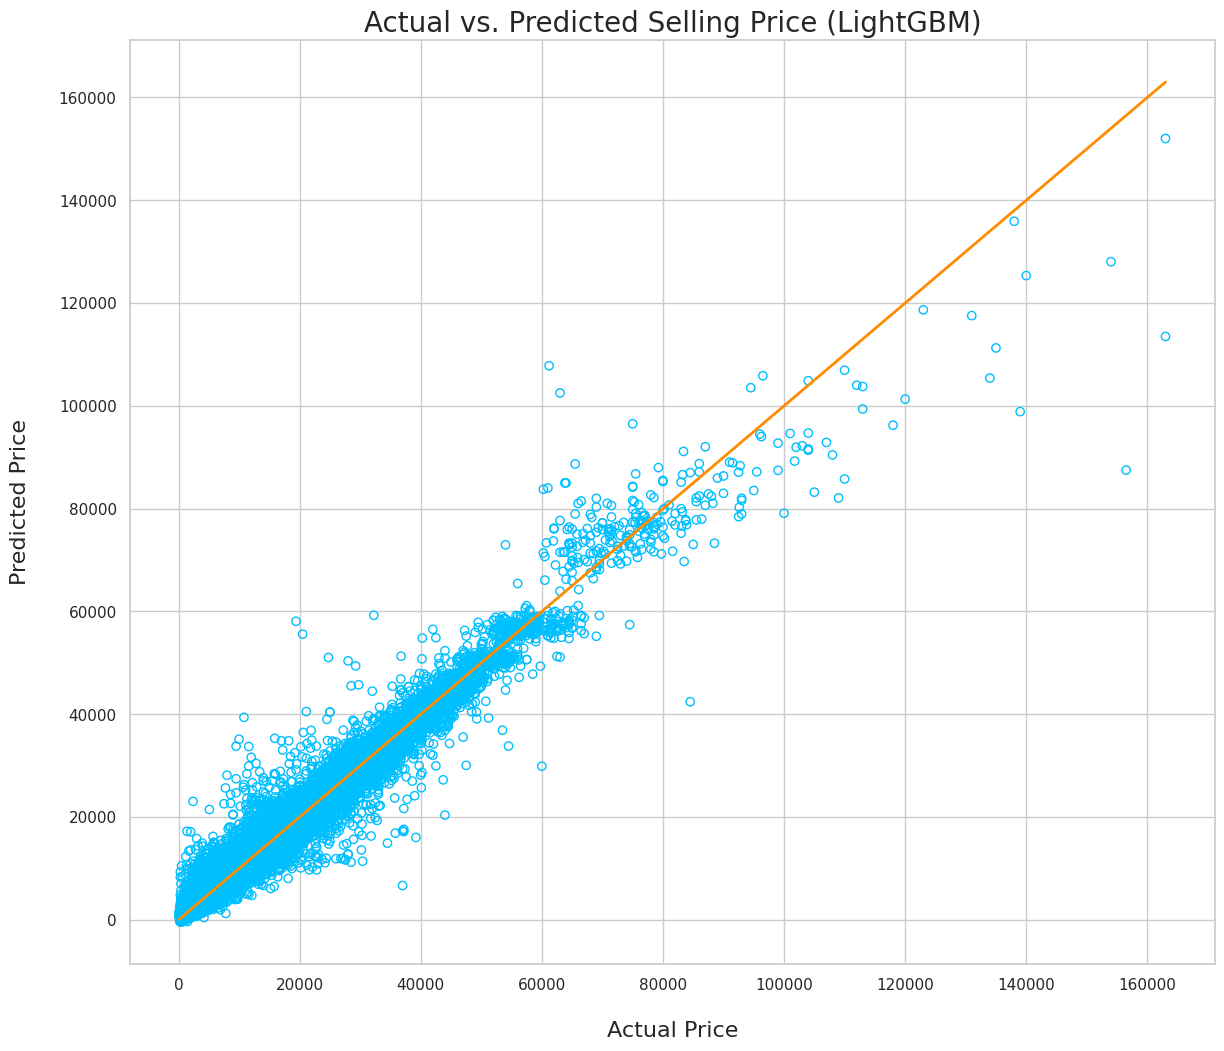

In [ ]:
lgbm_params = {
    'num_leaves': [31],
    'reg_alpha': [0.1],
    'n_estimators': [100, 200], # Reduced the number of estimators
    'learning_rate': [0.05, 0.1], # Reduced the number of learning rates
}

lgbm_cv = GridSearchCV(LGBMRegressor(random_state=42),
                       lgbm_params, cv=5, n_jobs=-1, verbose=1) # Reduced cross-validation folds
lgbm_cv.fit(dataset_train_x, dataset_train_y)

print(f"Best hyperparameters: {lgbm_cv.best_params_}")
print(f"Best R² (train): {lgbm_cv.best_score_}")

lgbm_mod = LGBMRegressor(**lgbm_cv.best_params_, random_state=42)
lgbm_mod.fit(dataset_train_x, dataset_train_y)

y_pred = lgbm_mod.predict(dataset_test_x)

model_list.append(lgbm_mod.__class__.__name__)
r2_list.append(round(rsqr_score(dataset_test_y, y_pred), 4))
rmse_list.append(round(rmse_score(dataset_test_y, y_pred), 4))

plt.figure()
plt.title("Actual vs. Predicted Selling Price (LightGBM)", fontsize=20)
plt.scatter(dataset_test_y, y_pred, color="deepskyblue", marker="o", facecolors="none")
plt.plot([dataset_test_y.min(), dataset_test_y.max()],
         [dataset_test_y.min(), dataset_test_y.max()],
         "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

###6.2.5 Linear Regression

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best hyperparameters: {'fit_intercept': True, 'positive': False}
Best R² (train): 0.9696054325084911


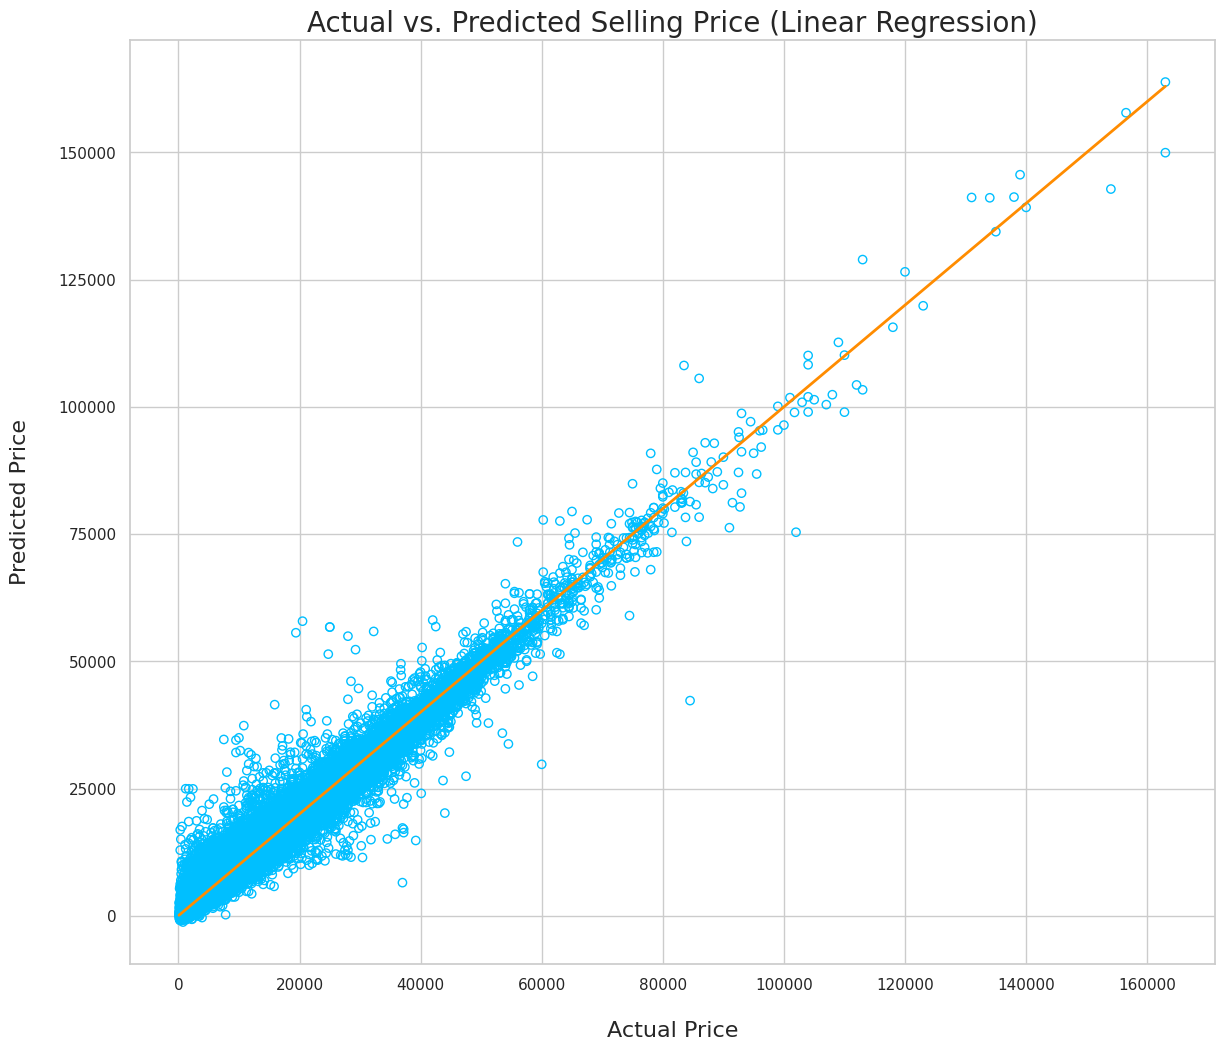

In [ ]:
from sklearn.linear_model import LinearRegression

linreg_params = {
    "fit_intercept": [True, False],
    "positive": [True, False]
}

linreg_cv = GridSearchCV(LinearRegression(), linreg_params, cv=10, n_jobs=-1, verbose=1)
linreg_cv.fit(dataset_train_x, dataset_train_y)

print(f"Best hyperparameters: {linreg_cv.best_params_}")
print(f"Best R² (train): {linreg_cv.best_score_}")

linreg_mod = LinearRegression(**linreg_cv.best_params_)
linreg_mod.fit(dataset_train_x, dataset_train_y)

y_pred = linreg_mod.predict(dataset_test_x)

model_list.append(linreg_mod.__class__.__name__)
r2_list.append(round(rsqr_score(dataset_test_y, y_pred), 4))
rmse_list.append(round(rmse_score(dataset_test_y, y_pred), 4))

plt.figure()
plt.title("Actual vs. Predicted Selling Price (Linear Regression)", fontsize=20)
plt.scatter(dataset_test_y, y_pred, color="deepskyblue", marker="o", facecolors="none")
plt.plot([dataset_test_y.min(), dataset_test_y.max()],
         [dataset_test_y.min(), dataset_test_y.max()],
         "darkorange", lw=2)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()

##6.3. Choosing the Best Model

In [ ]:
import pickle
import pandas as pd

# Buat DataFrame hasil evaluasi
results_df = pd.DataFrame({
    "Model": model_list,
    "R2": r2_list,
    "RMSE": rmse_list
})

print("\n=== Hasil Evaluasi Model ===")
print(results_df)

# Pilih model terbaik → R² tertinggi, jika seri cek RMSE terendah
best_index = results_df.sort_values(by=["R2", "RMSE"], ascending=[False, True]).index[0]
best_model_name = results_df.loc[best_index, "Model"]

print(f"\nBest Model: {best_model_name}")

# Ambil objek model dari variabel yang sudah dibuat sebelumnya
model_dict = {
    "Ridge": ridge_mod,
    "Lasso": lasso_mod,
    "XGBRegressor": xgb_mod,
    "LGBMRegressor": lgbm_mod,
    "LinearRegression": linreg_mod,
}
best_model = model_dict[best_model_name]


=== Hasil Evaluasi Model ===
              Model      R2       RMSE
0             Ridge  0.9710  1648.8241
1             Lasso  0.9710  1648.8240
2      XGBRegressor  0.9676  1741.0591
3     LGBMRegressor  0.9756  1511.3714
4  LinearRegression  0.9710  1648.8241

Best Model: LGBMRegressor


##6.4. Prediction on Real Test Dataset

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

real_predictions = best_model.predict(dataset_test_x)

# Gabung hasil prediksi ke DataFrame
pred_df = pd.DataFrame({
    "Actual": dataset_test_y,  # jika ada label asli
    "Predicted": real_predictions
})
print("\n=== Hasil Prediksi pada Real Dataset ===")
print(pred_df.head())

# Calculate evaluation metrics
r2 = r2_score(dataset_test_y, real_predictions)
rmse = np.sqrt(mean_squared_error(dataset_test_y, real_predictions))
mape = np.mean(np.abs((dataset_test_y - real_predictions) / dataset_test_y)) * 100

print("\n=== Evaluation Metrics ===")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")


=== Hasil Prediksi pada Real Dataset ===
         Actual     Predicted
311497  13800.0  13653.009835
171592   6300.0   6659.592620
55288    8000.0   7620.539614
190760  11400.0  11527.554703
180999  23300.0  21797.932294

=== Evaluation Metrics ===
R2: 0.9756
RMSE: 1511.3714
MAPE: 13.2191%


In [ ]:
dataset_test_x.head()

,year,condition,odometer,mmr,make,model,trim,body,state,color,interior,seller,transmission_automatic,transmission_manual,transmission_others
311497,0.998541,-2.016123,-0.876689,-0.032984,-0.951687,0.016703,0.075846,-0.221733,-0.967864,1.142899,-0.691481,-0.367353,0.417417,-0.180031,-0.363991
171592,-1.774433,0.017785,0.213406,-0.800058,-0.776114,0.849279,0.764087,-0.435017,-0.102219,1.423658,-0.691481,1.330327,-2.395686,-0.180031,2.747323
55288,-0.766079,0.243775,-0.049056,-0.660590,0.921094,-0.228688,-0.188168,-1.714715,0.244038,0.721759,-0.691481,-1.121714,0.417417,-0.180031,-0.363991
190760,0.242275,0.921745,-0.836854,-0.306755,1.506338,-0.772054,0.003637,-0.221733,-0.967864,-1.243558,-0.912532,1.711193,0.417417,-0.180031,-0.363991
180999,0.494364,0.319105,-0.783496,0.901968,0.218801,-0.623066,-0.887692,-0.221733,1.023118,-1.243558,-0.249379,0.324103,-2.395686,-0.180031,2.747323


##6.5 Save best model ke Pickle

In [ ]:
with open(f"{best_model_name}_best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\nModel terbaik '{best_model_name}' berhasil disimpan sebagai pickle.")


Model terbaik 'LGBMRegressor' berhasil disimpan sebagai pickle.


#7.&nbsp;Conclusion

Berdasarkan hasil evaluasi model pada proyek prediksi harga mobil, beberapa algoritma regresi telah diuji, yaitu Ridge Regression, Lasso Regression, XGBRegressor, LGBMRegressor, dan Linear Regression. Evaluasi menggunakan metrik R² dan RMSE menunjukkan bahwa hampir semua model memiliki performa yang cukup tinggi dengan nilai R² di kisaran 0,9676 hingga 0,9756, menandakan kemampuan yang baik dalam menjelaskan variasi data. Namun, model LGBMRegressor menempati posisi terbaik dengan nilai R² sebesar 0,9756 dan RMSE terendah sebesar 1511,37, menunjukkan akurasi prediksi yang paling tinggi dan kesalahan prediksi paling rendah dibandingkan model lainnya. Hal ini mengindikasikan bahwa LGBMRegressor paling efektif dalam menangkap pola hubungan antara fitur-fitur seperti tahun produksi, merek, model, kondisi, odometer, dan variabel lainnya terhadap harga jual mobil. Dengan performa yang unggul, LGBMRegressor menjadi pilihan optimal untuk digunakan dalam memprediksi harga mobil pada dataset ini.